In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [17]:
df=pd.read_csv('Universities.csv')
#loading the dataset
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [18]:
#dropping the column ['Univ']
df=df.drop('Univ',axis=1)
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [19]:
#check apakah ada yang null atau tidak
df.isnull().sum()

SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [20]:
#information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SAT       25 non-null     int64
 1   Top10     25 non-null     int64
 2   Accept    25 non-null     int64
 3   SFRatio   25 non-null     int64
 4   Expenses  25 non-null     int64
 5   GradRate  25 non-null     int64
dtypes: int64(6)
memory usage: 1.3 KB
None


In [21]:
#statistical data
print(df.describe())

               SAT       Top10     Accept   SFRatio      Expenses   GradRate
count    25.000000   25.000000  25.000000  25.00000     25.000000  25.000000
mean   1266.440000   76.480000  39.200000  12.72000  27388.000000  86.720000
std     108.359771   19.433905  19.727308   4.06735  14424.883165   9.057778
min    1005.000000   28.000000  14.000000   6.00000   8704.000000  67.000000
25%    1240.000000   74.000000  24.000000  11.00000  15140.000000  81.000000
50%    1285.000000   81.000000  36.000000  12.00000  27553.000000  90.000000
75%    1340.000000   90.000000  50.000000  14.00000  34870.000000  94.000000
max    1415.000000  100.000000  90.000000  25.00000  63575.000000  97.000000


In [22]:
#teknik preprocessing
ssc=StandardScaler()
scaled_data=pd.DataFrame(ssc.fit_transform(df),columns=df.columns)
scaled_data.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


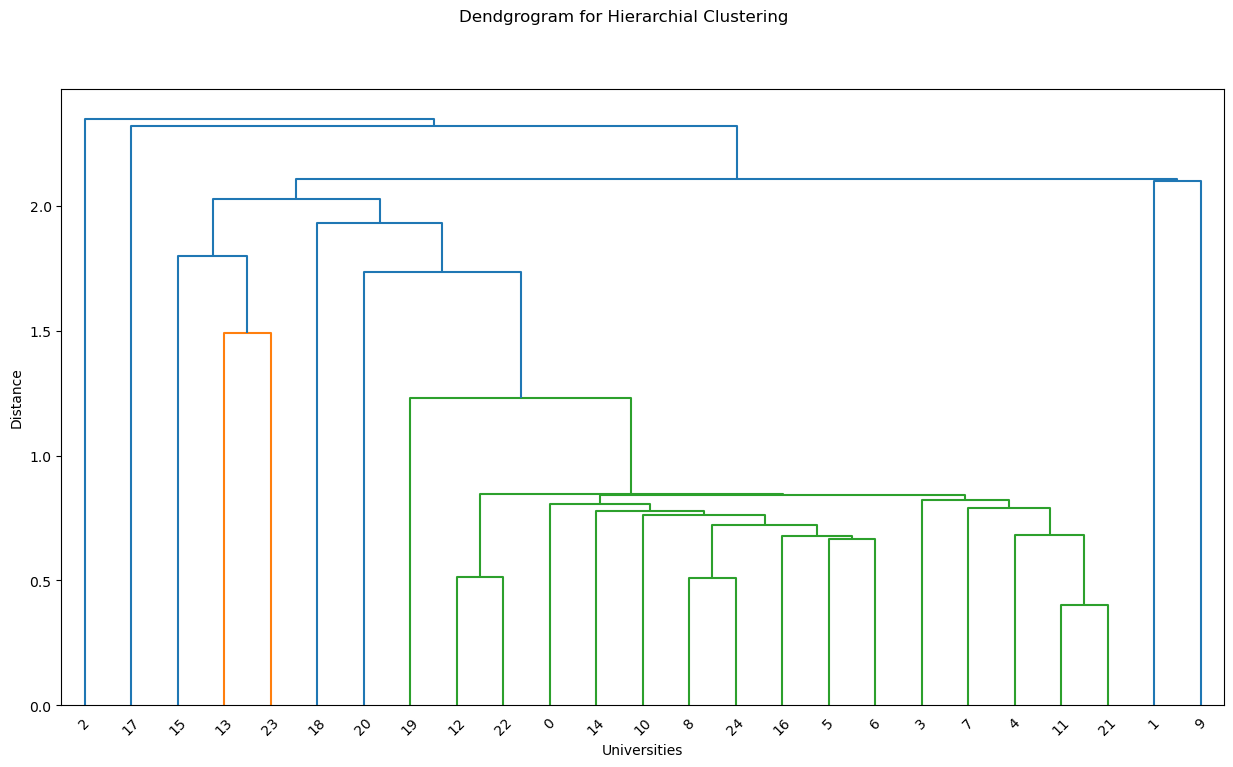

In [23]:
#buat linkage dan dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
L=linkage(scaled_data,method='single',metric='euclidean',optimal_ordering=False)
#plotting dendrogram
plt.figure(figsize=(15,8))
dendrogram(L)
plt.xlabel('Universities')
plt.ylabel('Distance')
plt.suptitle('Dendgrogram for Hierarchial Clustering')
plt.show()

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 

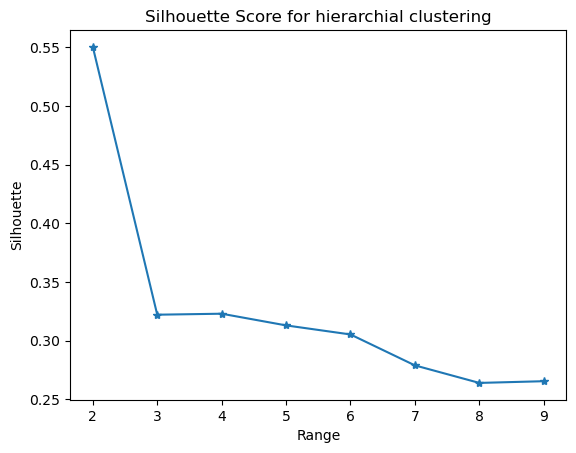

In [24]:
silhouette=[]
for i in range(2,10):
    ac=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    ac_labels=ac.fit_predict(scaled_data)
    silhouette.append(silhouette_score(scaled_data,ac_labels))
    
plt.plot(range(2,10),silhouette,marker='*')
plt.xlabel('Range')
plt.ylabel('Silhouette')
plt.title('Silhouette Score for hierarchial clustering')
plt.show()


In [25]:
acc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
acc.fit_predict(scaled_data)

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [13]:
metrics.silhouette_score(scaled_data,acc.labels_)

0.32291832812342597